In [ ]:
import random
import time
import math
import csv
import statistics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
import scipy

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

import statsmodels.api as sm

import seaborn as sns
sns.set()



# Analysis Functions

In [ ]:
def compute_lrt_pdf(datapoints):
    minimum, maximum = int(min(datapoints)), int(max(datapoints))
    total_count = len(datapoints)

    if minimum == 0: minimum = 0.5

    ## In the below code, need to enforce a maximum due to 
    ## rarer and rarer values along the x-axis. This helps
    ## for computing KL-divergence
    # bins = list(np.arange(minimum, math.ceil(maximum)+1, 1))
    bins = list(np.arange(minimum, 10.5, 1))

    digitized = np.digitize(datapoints, bins)
    
    pdf = [len(list(filter(lambda x: x == int(b), digitized))) / total_count for b in bins]

    return bins, pdf

def compute_p_values(datapoints): return [scipy.stats.chi2.sf(lrt, 1) for lrt in datapoints]

# Find lower bound singular matrices
Perform range test to find where we start to see singular matrices based on lowering the sample size.

In [ ]:
for sample_size in range(400, 100, -25):
      print('**', sample_size, '**')
      
      x, y = make_classification(n_samples=sample_size, 
                                n_features=100, 
                                n_redundant=0, 
                                n_repeated=0, 
                                class_sep=0.0)

      dataset = pd.DataFrame({str(i):x[:,i] for i in range(100)})
      dataset['y'] = y

      # log_reg1 = sm.Logit(dataset.y.to_list(), dataset.loc[:,~dataset.columns.isin(['y', '1'])]).fit(disp=0)
      log_reg2 = sm.Logit(dataset.y.to_list(), dataset.loc[:,~dataset.columns.isin(['y'])]).fit(disp=0)
      


** 400 **
** 375 **
** 350 **
** 325 **
** 300 **
** 275 **
** 250 **
** 225 **
** 200 **


/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: ignored

# Lower-Bound Bias
Show lower bound biasedness

In [ ]:
n_samples = 275
n_features = 2

all_data = {}

save_a_sample = None

start_time = time.time()
loop_start_time = None
for sample_count in range(102, 103, 1):
    datapoints = []
    print(sample_count)
    for count, i in enumerate(range(7500)):
      
      x, y = make_classification(n_samples=n_samples, 
                                n_features=sample_count, 
                                n_redundant=0, 
                                n_repeated=0, 
                                class_sep=0.0)
      # print(x, y)
      # dataset = pd.DataFrame({'0':x[:,0], '1':x[:,1], 'y':y})
      dataset = pd.DataFrame({str(i):x[:,i] for i in range(sample_count)})
      dataset['y'] = y
      # print(dataset)
      # quit()

      # dataset = sm.add_constant(dataset)
      # print(dataset)
      log_reg1 = sm.Logit(dataset.y.to_list(), dataset.loc[:,~dataset.columns.isin(['y', '1'])]).fit(disp=0)
      log_reg2 = sm.Logit(dataset.y.to_list(), dataset.loc[:,~dataset.columns.isin(['y'])]).fit(disp=0)
      # print(log_reg1.llf, log_reg2.llf)
      lrt = -2 * (log_reg1.llf - log_reg2.llf)
      datapoints.append(lrt)
      if count % 100 == 0:
          stop_time = time.time()
          if not loop_start_time:
              loop_start_time = time.time()
          else:
              print(f'Count: {count} ... Time: {stop_time - start_time} ... Loop {stop_time - loop_start_time}')
          loop_start_time = time.time()
          save_a_sample = dataset
      
      all_data[sample_count] = datapoints



102
Count: 100 ... Time: 8.221585512161255 ... Loop 8.120967864990234
Count: 200 ... Time: 15.776129484176636 ... Loop 7.553074359893799
Count: 300 ... Time: 23.687363147735596 ... Loop 7.909966468811035
Count: 400 ... Time: 31.355506896972656 ... Loop 7.667977571487427
Count: 500 ... Time: 38.976738929748535 ... Loop 7.619033098220825
Count: 600 ... Time: 46.58132195472717 ... Loop 7.60328221321106
Count: 700 ... Time: 54.902151346206665 ... Loop 8.319926738739014
Count: 800 ... Time: 62.67460250854492 ... Loop 7.772260427474976
Count: 900 ... Time: 70.64885067939758 ... Loop 7.972983360290527
Count: 1000 ... Time: 78.87610816955566 ... Loop 8.225865840911865
Count: 1100 ... Time: 86.6573257446289 ... Loop 7.779924392700195
Count: 1200 ... Time: 94.56548476219177 ... Loop 7.906863451004028
Count: 1300 ... Time: 102.52038598060608 ... Loop 7.953620672225952
Count: 1400 ... Time: 110.45497345924377 ... Loop 7.933449983596802
Count: 1500 ... Time: 118.27981114387512 ... Loop 7.8235249519

In [ ]:
n_samples = 300
n_features = 2

all_data = {}

start_time = time.time()
loop_start_time = None
for sample_count, i in enumerate(range(2, 1003, 50)):
    datapoints = []
    for count, i in enumerate(range(2000)):
      x, y = make_classification(n_samples=sample_count, 
                                n_features=n_features, 
                                n_redundant=0, 
                                n_repeated=0, 
                                class_sep=0.0)
      # print(x, y)
      # dataset = pd.DataFrame({'0':x[:,0], '1':x[:,1], 'y':y})
      dataset = pd.DataFrame({str(i):x[:,i] for i in range(sample_count+3)})
      dataset['y'] = y
      print(dataset)
      quit()

      # dataset = sm.add_constant(dataset)
      # print(dataset)
      log_reg1 = sm.Logit(dataset.y.to_list(), dataset.loc[:,~dataset.columns.isin(['y', '1'])]).fit(disp=0)
      log_reg2 = sm.Logit(dataset.y.to_list(), dataset.loc[:,~dataset.columns.isin(['y'])]).fit(disp=0)
      # print(log_reg1.llf, log_reg2.llf)
      lrt = -2 * (log_reg1.llf - log_reg2.llf)
      datapoints.append(lrt)
      if count % 100 == 0:
          stop_time = time.time()
          if not loop_start_time:
              loop_start_time = time.time()
          else:
              print(f'Count: {count} ... Time: {stop_time - start_time} ... Loop {stop_time - loop_start_time}')
          loop_start_time = time.time()
      
      all_data[sample_count] = datapoints



IndexError: ignored

In [ ]:
x, y = make_classification(n_samples=n_samples, 
                                n_features=sample_count, 
                                n_redundant=0, 
                                n_repeated=0, 
                                class_sep=0.0)

102


[5.903082451986592, 0.4370395856707887, 5.939435220055913, 1.0212790639808986, 1.4063828350176664, 2.8343743732723397, 2.3405413314969508, 0.0051583804124675225, 0.19084520842497454, 0.17702656940946326, 0.6984039574630572, 4.280656732381999, 2.271790743112092, 6.012262919684218, 3.5139132687144183, 2.114780811985554, 1.3574368690456424, 1.8279356618590157, 0.11473667307689084, 1.336264931077551, 0.27065736917396066, 8.343823897384908, 1.1374656981576265, 0.918972674845719, 3.2665034485971773, 0.05432983552918813, 0.41007789238369696, 0.00041620199959879756, 8.313261901093938e-08, 0.00024106495993692079, 3.4323142787041547, 0.08059628275270825, 1.150894395712612, 0.05209934843668407, 0.22553346697168308, 0.21533265906833776, 1.8997023063755023, 0.47264078552484534, 0.9913743774700379, 2.187835961908661, 0.09434310801736956, 0.5717401758515734, 0.11744777383086102, 3.2079849441598753, 0.3813314760744788, 0.31304931235700906, 2.111114406500718, 5.126608727859036, 0.2958661847545727, 2.58

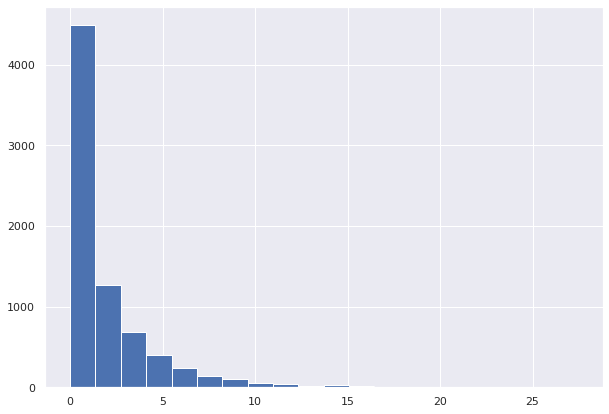

In [ ]:
print(all_data[102])
fig, ax = plt.subplots(figsize =(10, 7))
# ret = pd.qcut(datapoints, 10)
# print(ret)
ax.hist(all_data[102], bins=20)
plt.show()

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
datapoints: 27
[0.00258153 0.01332181 0.01320698 0.01225816 0.0151627  0.01136778
 0.01100151 0.00646371 0.00661508 0.00607413]
KL-Divergence: 0.09805340026795387


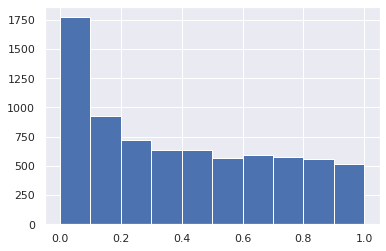

In [ ]:

# p_vals.append(scipy.stats.chi2.sf(lrt, 1))

bins, pdf = compute_lrt_pdf(all_data[102])
chi2 = stats.chi2.pdf(bins, df=1)

# print(chi2)
# print(pdf)
print(scipy.special.kl_div(chi2, pdf))
print('KL-Divergence:', sum(scipy.special.kl_div(chi2, pdf)))

p_vals = compute_p_values(all_data[102])
# bins = list(np.arange(0, 1, 0.1))
# digitized = np.digitize(p_vals, bins)


plt.hist(p_vals)
plt.show()


# Below are the two sample tests, statistics and charts.

In [ ]:
n_samples = 500
n_features = 2

two_feature_sample = []

save_a_sample = None

start_time = time.time()
loop_start_time = None
for sample_count in range(102, 103, 1):
    datapoints = []
    print(sample_count)
    for count, i in enumerate(range(7500)):
      
      x, y = make_classification(n_samples=400, 
                                n_features=100, 
                                n_redundant=0, 
                                n_repeated=0, 
                                class_sep=0.0)

      dataset = pd.DataFrame({str(i):x[:,i] for i in range(2)})
      dataset['y'] = y

      log_reg1 = sm.Logit(dataset.y.to_list(), dataset.loc[:,~dataset.columns.isin(['y', '1'])]).fit(disp=0)
      log_reg2 = sm.Logit(dataset.y.to_list(), dataset.loc[:,~dataset.columns.isin(['y'])]).fit(disp=0)

      lrt = -2 * (log_reg1.llf - log_reg2.llf)
      two_feature_sample.append(lrt)
      if count % 100 == 0:
          stop_time = time.time()
          if not loop_start_time:
              loop_start_time = time.time()
          else:
              print(f'Count: {count} ... Time: {stop_time - start_time} ... Loop {stop_time - loop_start_time}')
          loop_start_time = time.time()
          save_a_sample = dataset
      
      

102
Count: 100 ... Time: 3.1245577335357666 ... Loop 3.008986711502075
Count: 200 ... Time: 4.249598026275635 ... Loop 1.1243071556091309
Count: 300 ... Time: 5.326146841049194 ... Loop 1.075371265411377
Count: 400 ... Time: 6.411204099655151 ... Loop 1.0838658809661865
Count: 500 ... Time: 7.45645546913147 ... Loop 1.044043779373169
Count: 600 ... Time: 8.526262760162354 ... Loop 1.0686373710632324
Count: 700 ... Time: 9.58425521850586 ... Loop 1.056804895401001
Count: 800 ... Time: 10.647153615951538 ... Loop 1.0617084503173828
Count: 900 ... Time: 11.711967468261719 ... Loop 1.0636327266693115
Count: 1000 ... Time: 12.79924750328064 ... Loop 1.085700511932373
Count: 1100 ... Time: 14.602556228637695 ... Loop 1.8021085262298584
Count: 1200 ... Time: 15.684156894683838 ... Loop 1.0814621448516846
Count: 1300 ... Time: 16.74379539489746 ... Loop 1.0582177639007568
Count: 1400 ... Time: 17.8150372505188 ... Loop 1.0700550079345703
Count: 1500 ... Time: 18.91387939453125 ... Loop 1.09765

[0 0 0 ... 2 7 1] 7500 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 28, 30}
0.9999999999999998


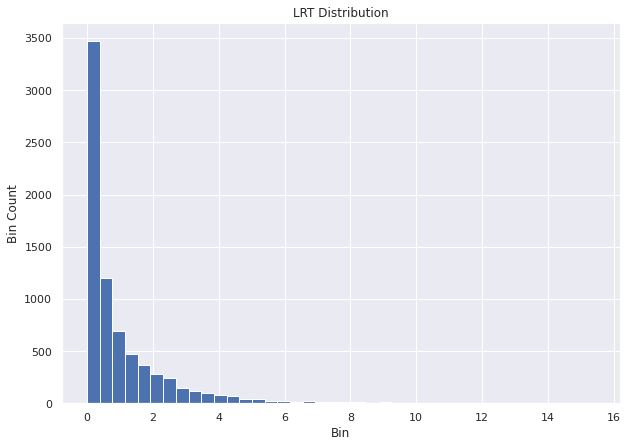

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


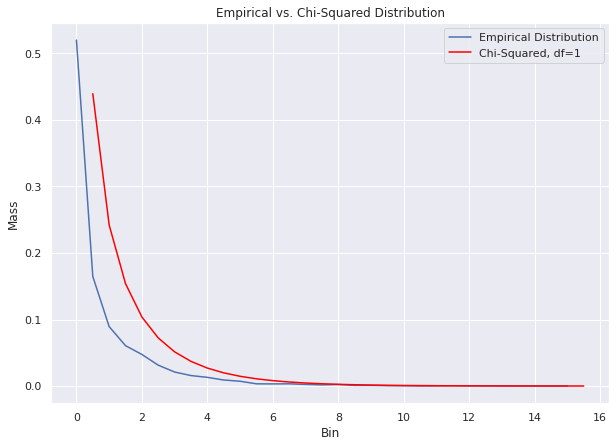

[0.52       0.68466667 0.774      0.83466667 0.88213333 0.91346667
 0.93453333 0.95026667 0.96333333 0.9724     0.9796     0.98293333
 0.98613333 0.98946667 0.99186667 0.9936     0.99586667 0.9968
 0.99773333 0.99826667 0.99866667 0.9988     0.99906667 0.99946667
 0.99973333 0.99986667 1.        ]
27


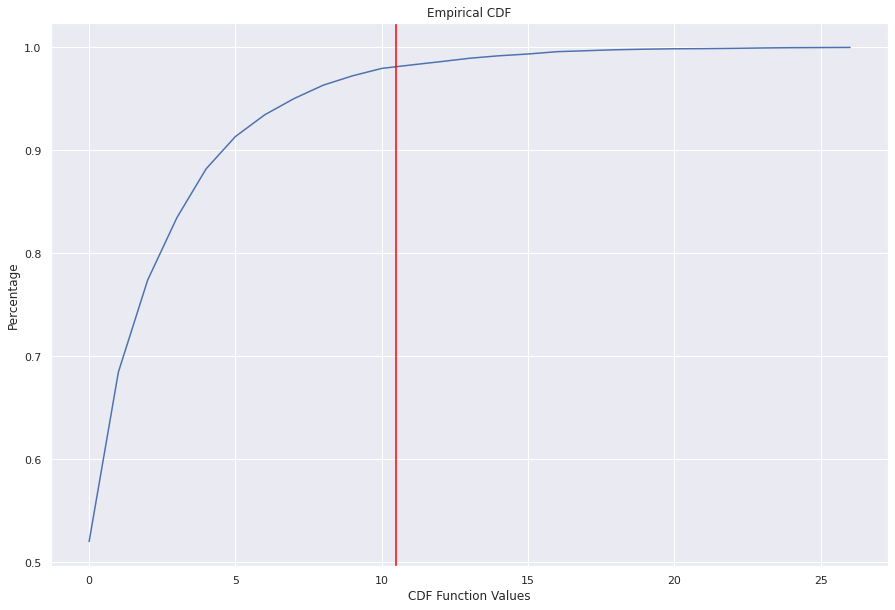

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))

b_size = np.arange(0.5, 16.5, 0.5)
b = np.digitize(two_feature_sample, b_size)

b_plot = [len(list(filter(lambda x: x == int(i), b))) / len(two_feature_sample) for i in set(b)]
print(b, len(b), set(b))
print(sum(b_plot))


ax.hist(two_feature_sample, bins=40)
ax.set_xlabel('Bin')
ax.set_ylabel('Bin Count')
x = np.arange(0, 16, 0.5)
plt.title('LRT Distribution')
plt.show()

# print(sorted(set(np.array(b)/2.0)))
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('Empirical vs. Chi-Squared Distribution')
sns.lineplot(y=b_plot, x=sorted(set(np.array(b)/2.0)), legend='brief', label='Empirical Distribution')
sns.lineplot(x, stats.chi2.pdf(x, df=1), color='red', legend='brief', label='Chi-Squared, df=1')
ax.set_xlabel('Bin')
ax.set_ylabel('Mass')
plt.show()

fig, ax = plt.subplots(figsize =(15, 10))
cumsum = np.cumsum(b_plot)
cumsum = cumsum / cumsum[-1]
print(cumsum)
print(len(cumsum))
sns.lineplot(x=list(range(len(b_plot))), y=cumsum)
ax.set_xlabel('CDF Function Values')
ax.set_ylabel('Percentage')
plt.title('Empirical CDF')
y = ax.lines[0].get_ydata()
plt.axvline(10.5, color='red')
plt.show()


[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
datapoints: 14
[5.75223676e-03 2.54668418e-02 7.53564753e-03 2.57113529e-03
 2.26892058e-03 3.78141157e-04 4.23515349e-04 1.70944697e-04
 1.67966137e-04 8.82251763e-05]
KL-Divergence: 0.04482357451384127


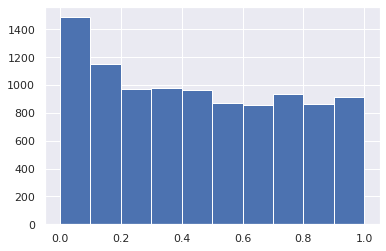

In [ ]:
two_feature_p_vals = compute_p_values(two_feature_sample)
bins = list(np.arange(0, 1, 0.1))
digitized = np.digitize(p_vals, bins)

bins, pdf = compute_lrt_pdf(two_feature_sample)
chi2 = stats.chi2.pdf(bins, df=1)


print(scipy.special.kl_div(chi2, pdf))
print('KL-Divergence:', sum(scipy.special.kl_div(chi2, pdf)))

plt.hist(p_vals)
plt.show()

# Plot KL Divergence as function of sample size


In [ ]:

all_data_2 = {}

save_a_sample = None

start_time = time.time()
loop_start_time = None
for sample_count in range(400, 270, -10):
    datapoints_2 = []
    print(sample_count)
    for count, i in enumerate(range(7500)):
      
      x, y = make_classification(n_samples=sample_count, 
                                n_features=100, 
                                n_redundant=0, 
                                n_repeated=0, 
                                class_sep=0.0)

      dataset = pd.DataFrame({str(i):x[:,i] for i in range(100)})
      dataset['y'] = y
   
      log_reg1 = sm.Logit(dataset.y.to_list(), dataset.loc[:,~dataset.columns.isin(['y', '1'])]).fit(disp=0)
      log_reg2 = sm.Logit(dataset.y.to_list(), dataset.loc[:,~dataset.columns.isin(['y'])]).fit(disp=0)
      lrt = -2 * (log_reg1.llf - log_reg2.llf)
      datapoints_2.append(lrt)
      if count % 100 == 0:
          stop_time = time.time()
          if not loop_start_time:
              loop_start_time = time.time()
          else:
              print(f'Count: {count} ... Time: {stop_time - start_time} ... Loop {stop_time - loop_start_time}')
          loop_start_time = time.time()
          save_a_sample = dataset
      
      all_data_2[sample_count] = datapoints_2


400
Count: 100 ... Time: 17.04002594947815 ... Loop 16.853631496429443
Count: 200 ... Time: 31.286434412002563 ... Loop 14.246224403381348
Count: 300 ... Time: 39.54504036903381 ... Loop 8.256792068481445
Count: 400 ... Time: 47.73713684082031 ... Loop 8.191897630691528
Count: 500 ... Time: 55.88206124305725 ... Loop 8.144756555557251
Count: 600 ... Time: 63.64583206176758 ... Loop 7.76216983795166
Count: 700 ... Time: 71.33014225959778 ... Loop 7.6826488971710205
Count: 800 ... Time: 79.93967533111572 ... Loop 8.608166456222534
Count: 900 ... Time: 87.82628726959229 ... Loop 7.886422157287598
Count: 1000 ... Time: 96.2016670703888 ... Loop 8.373697996139526
Count: 1100 ... Time: 104.94148993492126 ... Loop 8.738162994384766
Count: 1200 ... Time: 113.6995677947998 ... Loop 8.75664496421814
Count: 1300 ... Time: 121.49957752227783 ... Loop 7.798579692840576
Count: 1400 ... Time: 129.72056889533997 ... Loop 8.219534873962402
Count: 1500 ... Time: 137.50579047203064 ... Loop 7.78384709358

In [ ]:
# print(len(all_data_2[400]))
# from google.colab import drive
# # drive.mount('/content/drive')
# import csv

# for item in all_data_2:
#   with open(f'/content/drive/MyDrive/school/data_{item}.csv', 'w') as f:
#       writer = csv.writer(f)
#       print(type(all_data_2[item]))
#       writer.writerow(all_data_2[item])



7500
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# drive.flush_and_unmount()

Mounted at /content/drive/


[0.08619626249731858, 0.08985072180127433, 0.0851747672013482, 0.08654074726848492, 0.07518349942025801, 0.07368521785525647, 0.06859415956894087, 0.06803238925883526, 0.06493991380564777, 0.06772842834639707, 0.06585307565854544, 0.06554681038438402, 0.06377186944390231]
** MAX KL-Div: 0.08985072180127433
** MIN KL-Div: 0.06377186944390231


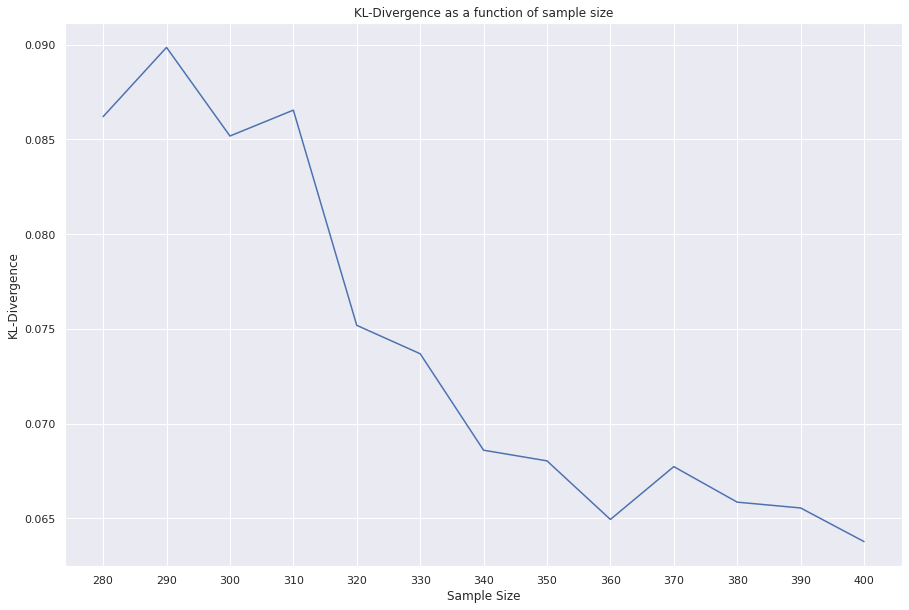

In [ ]:
files = ['data_280.csv', 'data_290.csv', 'data_300.csv', 'data_310.csv', 'data_320.csv', 
         'data_330.csv', 'data_340.csv', 'data_350.csv', 'data_360.csv', 'data_370.csv', 
         'data_380.csv', 'data_390.csv', 'data_400.csv']


kl_divergences = []

for item in files:
    f = f'/content/drive/MyDrive/school/{item}'
    with open(f, 'r') as f:
        reader = csv.reader(f)

        data = next(reader)
        data = list(map(float, data))

        bins, pdf = compute_lrt_pdf(data)
        chi2 = stats.chi2.pdf(bins, df=1)

        kl_divergences.append(sum(scipy.special.kl_div(chi2, pdf)))

print(kl_divergences)
print(f'** MAX KL-Div: {max(kl_divergences)}')
print(f'** MIN KL-Div: {min(kl_divergences)}')

sample_sizes = list(map(lambda x: x[5:8], files))


fig, ax = plt.subplots(figsize =(15, 10))

sns.lineplot(x=sample_sizes, y=kl_divergences, ax=ax)
plt.title('KL-Divergence as a function of sample size')
ax.set_xlabel('Sample Size')
ax.set_ylabel('KL-Divergence')
plt.show()

    

# Hypothesis test for extremes

In [ ]:
avg = np.average(kl_divergences)
var = np.var(kl_divergences)
sample_size = len(kl_divergences)

maximum = max(kl_divergences)
minimum = min(kl_divergences)
z_scores = stats.zscore(kl_divergences)

print('Average and Std Dev.', avg, np.sqrt(var))
print('z_score_max', z_scores[kl_divergences.index(max(kl_divergences))])
print('z_score_min', z_scores[kl_divergences.index(min(kl_divergences))])
print('p_value_max: ', stats.norm.sf(abs(z_scores[kl_divergences.index(max(kl_divergences))])))
print('p_value_min: ', stats.norm.sf(abs(z_scores[kl_divergences.index(min(kl_divergences))])))

print(z_scores)
print(avg)

## Bootstrap the mean
n = 10
b = 10000
boostrap_vals = np.random.choice(kl_divergences, b)
bootstrap_avg = np.average(boostrap_vals)
print('Bootstrap avg.: ', bootstrap_avg)


## Compute bootstrap variance
boot_variance = sum(np.array(boostrap_vals)**2) / b - (sum(boostrap_vals)/b)**2


# boot_variance = statistics.variance(var_experiments)
data_variance = statistics.variance(kl_divergences)
print(np.sqrt(boot_variance))
print(np.sqrt(data_variance))

z_score_boot_min = (min(kl_divergences) - bootstrap_avg) / (np.sqrt(boot_variance))
z_score_boot_max = (max(kl_divergences) - bootstrap_avg) / (np.sqrt(boot_variance))
p_val_boot_min =  stats.norm.sf(abs(z_score_boot_min))
p_val_boot_max =  stats.norm.sf(z_score_boot_max)
print('z_score_boot_min', z_score_boot_min, 'z_score_boot_max', z_score_boot_max)
print('p_val_boot_min', p_val_boot_min, 'p_val_boot_max', p_val_boot_max)






Average and Std Dev. 0.07393060480850717 0.009249839193649346
z_score_max 1.7211236497708435
z_score_min -1.0982607537198632
p_value_max:  0.04261419430357642
p_value_min:  0.1360453220237366
[ 1.3260401   1.72112365  1.21560626  1.36328234  0.13545042 -0.02652878
 -0.57692303 -0.63765601 -0.97198349 -0.67051722 -0.87326158 -0.90637191
 -1.09826075]
0.07393060480850717
Bootstrap avg.:  0.07392601080755717
0.009286977045740868
0.009627537874974536
z_score_boot_min -1.0933742286260615 z_score_boot_max 1.7147356901264708
p_val_boot_min 0.13711476199030748 p_val_boot_max 0.043196848462484956


# Correction Factor

1. Develop biased regression sample with k=0.3
2. Fit regression model, plot model with scatter data
3. Update regression line with correction factor and plot new line

From Reference #7, when k=0.3, the scaling adjustment should be 1.5. Listed in the abstract on p.1.
file:///C:/Users/ericd/Desktop/JohnsHopkins/MATH625.725/Project/Reference7.pdf

Counter: 0 total_run: 0.05779910087585449 loop_run: 0.05776071548461914
Counter: 250 total_run: 3.338484287261963 loop_run: 3.2791671752929688
Counter: 500 total_run: 6.485409259796143 loop_run: 3.1455628871917725
Counter: 750 total_run: 9.587778568267822 loop_run: 3.1010637283325195
Counter: 1000 total_run: 12.652573823928833 loop_run: 3.0634915828704834
Counter: 1250 total_run: 15.74398136138916 loop_run: 3.0898609161376953
Counter: 1500 total_run: 18.736387491226196 loop_run: 2.991107702255249
Counter: 1750 total_run: 21.69256043434143 loop_run: 2.954944372177124
Counter: 2000 total_run: 24.66419506072998 loop_run: 2.970319986343384
Counter: 2250 total_run: 27.575342655181885 loop_run: 2.909898042678833
Counter: 2500 total_run: 30.359702348709106 loop_run: 2.783162832260132
Counter: 2750 total_run: 33.42205452919006 loop_run: 3.061183452606201
Counter: 3000 total_run: 36.467225074768066 loop_run: 3.0438718795776367
Counter: 3250 total_run: 39.54306626319885 loop_run: 3.0745460987091

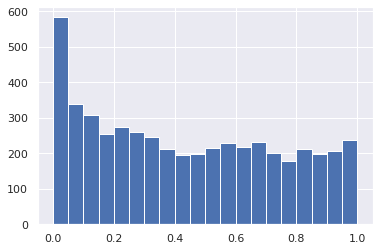

[0.08169245 0.61192358 0.71644573 ... 1.17490249 1.25021928 0.54040813]


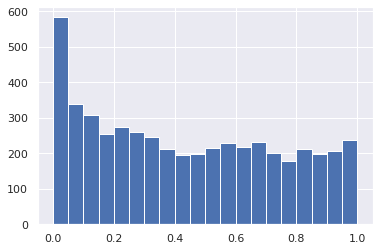

In [ ]:
n_experiments = 5000
sample_size = 100
correction = 1.5

n_features = int(0.3 * sample_size)

llr = []
statistics = []
start_time = time.time()
loop_start_time = total_time = time.time()
for experiment in range(n_experiments):
    x, y = make_classification(n_samples=sample_size, 
                              n_features=n_features, 
                              n_redundant=0, 
                              n_repeated=0, 
                              class_sep=0.0)
    
    dataset = pd.DataFrame({str(i):x[:,i] for i in range(n_features)})
    dataset['y'] = y
  
    log_reg1 = sm.Logit(dataset.y.to_list(), dataset.loc[:,~dataset.columns.isin(['y', '1'])]).fit(disp=0)
    log_reg2 = sm.Logit(dataset.y.to_list(), dataset.loc[:,~dataset.columns.isin(['y'])]).fit(disp=0)
    lrt = -2 * (log_reg1.llf - log_reg2.llf)
  
    llr.append(lrt)

    if experiment % 250 == 0:
        end_time = time.time()
        print(f'Counter: {experiment} total_run: {end_time - start_time} loop_run: {end_time - loop_start_time}')
        loop_start_time = time.time()

p_vals = compute_p_values(llr)

bins, pdf = compute_lrt_pdf(llr)
chi2 = stats.chi2.pdf(bins, df=1)
rescaled_chi2 = 1.5 * stats.chi2.pdf(bins, df=1)
# print(scipy.special.kl_div(chi2, pdf))
# print('KL-Divergence:', sum(scipy.special.kl_div(chi2, pdf)))
print(sum(scipy.special.kl_div(chi2, pdf)))
print('rescaled, ', sum(scipy.special.kl_div(rescaled_chi2, pdf)))

plt.hist(p_vals, bins=20)
plt.show()

rescaled_p_vals = 1.5 * np.array(p_vals)
print(rescaled_p_vals)
plt.hist(np.array(rescaled_p_vals) / max(rescaled_p_vals), bins=20)
plt.show()